# Nitrous Oxide Emissions Logistic Fit

Purpose: Fit logistic function to anthropogenic N2O emissions from 1750-2016, using emissions estimates compiled in heat17n2oemitdec16.nb and the inflection point from a logistic fit to the increment in global population over its 1820 value

Clear all variables and reset the working directory and import necessary libraries

In [1]:
%reset -f
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import csv
os.chdir('C:\\Users\\cd7\\Desktop\\Heat17N2O')

Read input files and assign the year values and methane historical concentration data

In [2]:
df = pd.read_excel('heat17n2oemitdec16.xlsx')
df.to_csv('heat17n2oemitdec16.csv',header=False,index=False)
df = pd.read_csv('heat17n2oemitdec16.csv')
df.drop(df.index[[-1]],inplace=True)
emit = df.iloc[:,1].tolist()
emit = list(map(float, emit))
yrs = df.iloc[:,0].tolist()
yrs = list(map(int, yrs))
f = open('C:\\Users\\cd7\\Desktop\\Heat17Population\\CAGE_Pop_Parameters.csv','r')
readFile = csv.reader(f)
data = [row for row in readFile]
b21 = float(data[3][1])

Define the fitted logistic function and fit data

In [3]:
def logistic(yrs,b1,b3):
     y = b1 / (1 + np.exp(-(yrs-b21)/b3))
     return y
param_bounds=([0,0],[200,100])
popt, pcov = curve_fit(logistic, yrs, emit, bounds=param_bounds)
print (popt)

[ 2.39110876 40.31831361]


Plot the fitted logistic function,comparing with the historical data and save the results as a csv file.

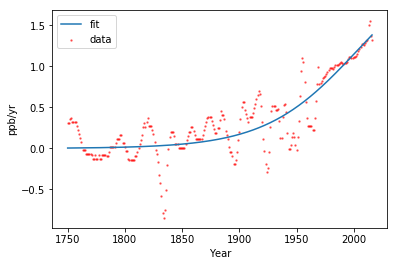

In [4]:
x = np.array(yrs)
y = logistic(x, *popt)
plt.scatter(yrs, emit, s=2, c='r' , alpha = 0.5, label="data",marker='o') # make the scatter plot for historical data
plt.plot(yrs,y, label='fit') # make plot of the fitted data
plt.xlabel('Year')
plt.ylabel('ppb/yr')
plt.legend(loc='best')
plt.savefig('n2opost.eps',dpi=1000)
plt.show()